# Explore here

In [289]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge

from sklearn.metrics import mean_squared_error, r2_score


In [290]:
url = "https://breathecode.herokuapp.com/asset/internal-link?id=929&path=medical_insurance_cost.csv"
pd.read_csv(url).to_csv('../data/medical_insurance_cost.csv', index=False)

In [291]:
df = pd.read_csv("../data/medical_insurance_cost.csv")

In [292]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [294]:
#Eliminar duplicados
duplicados = df.duplicated()
num_duplicados = duplicados.sum()
print(f"Duplicados del data frame {num_duplicados}")

df = df.drop_duplicates()
print(df.duplicated().sum())

Duplicados del data frame 1
0


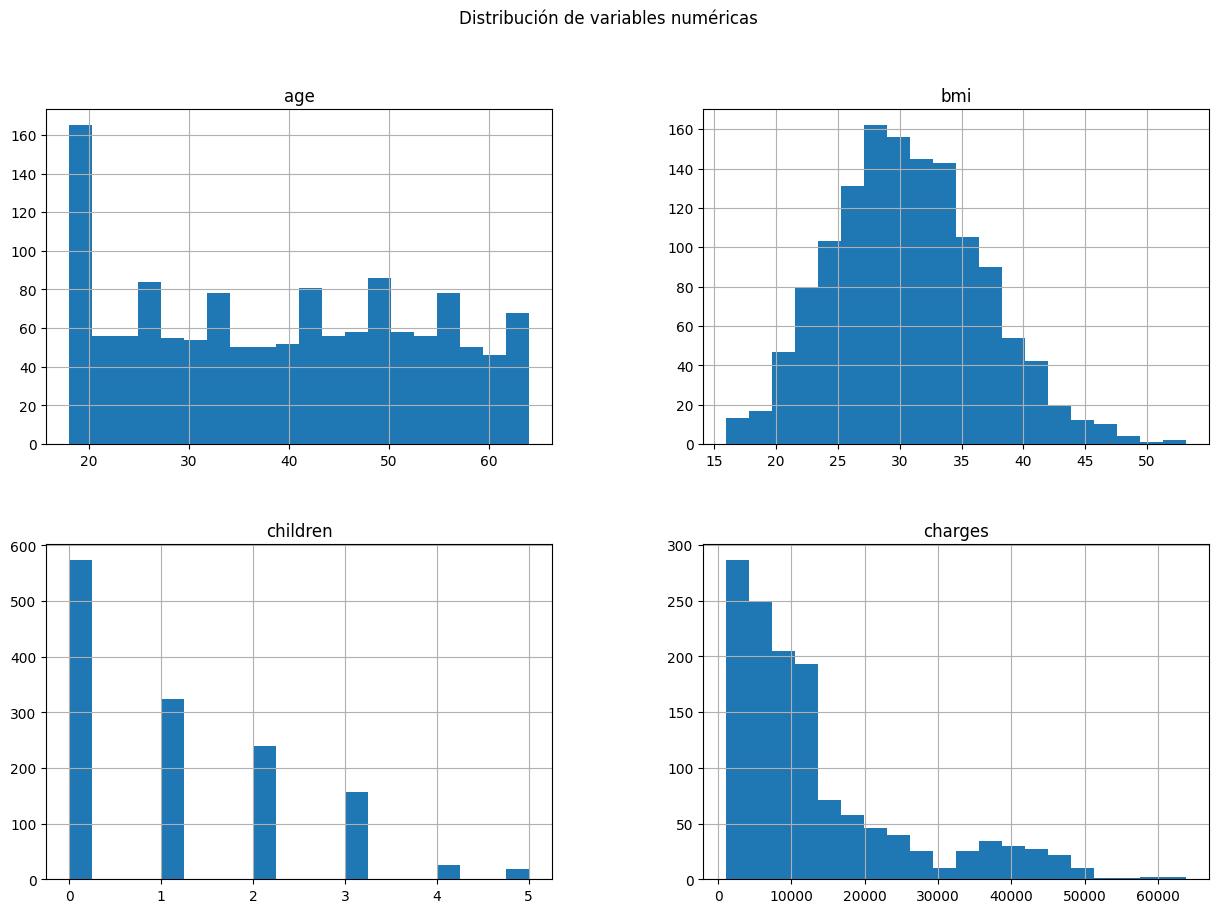

In [295]:
# Aislar variantes numericas y ver distribucion
num_cols = df.select_dtypes(include='number').columns
df[num_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribución de variables numéricas')
plt.show()

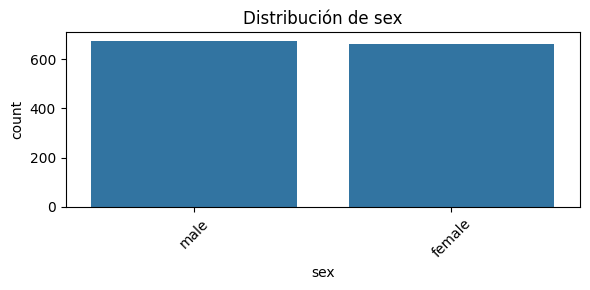

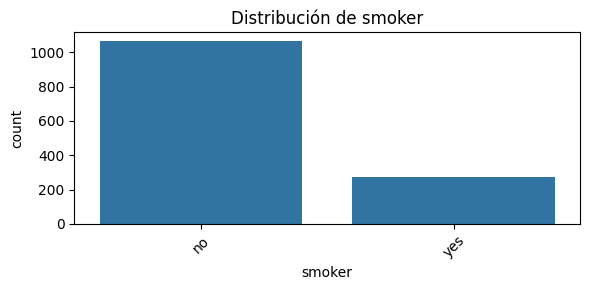

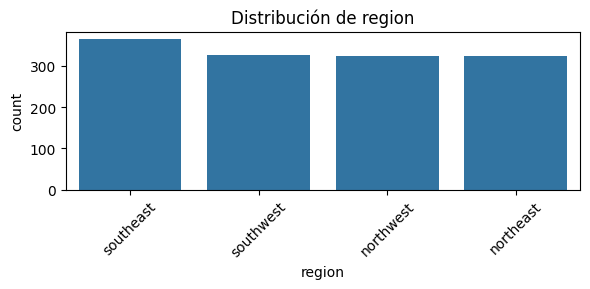

In [296]:
#Aislar variantes categoricas y ver distribucion
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

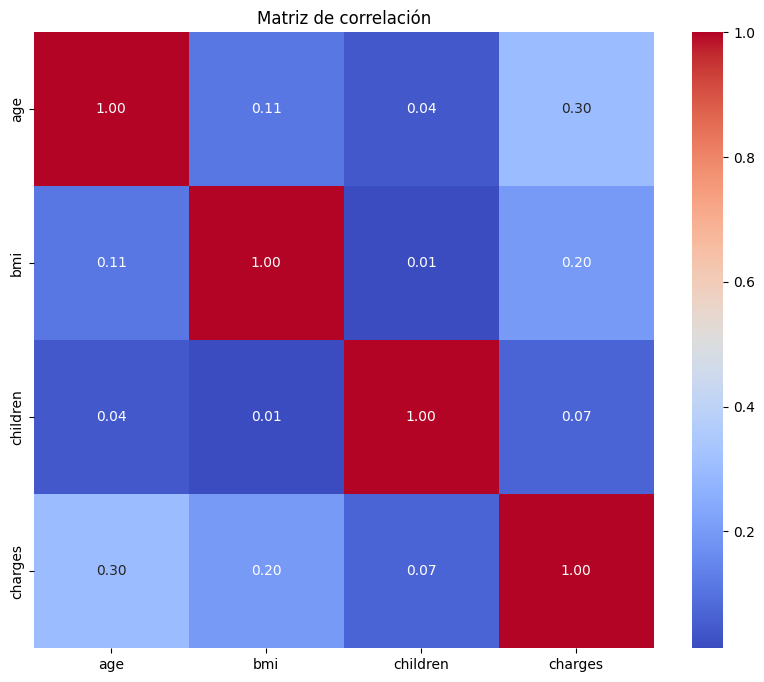

In [297]:
corr = df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

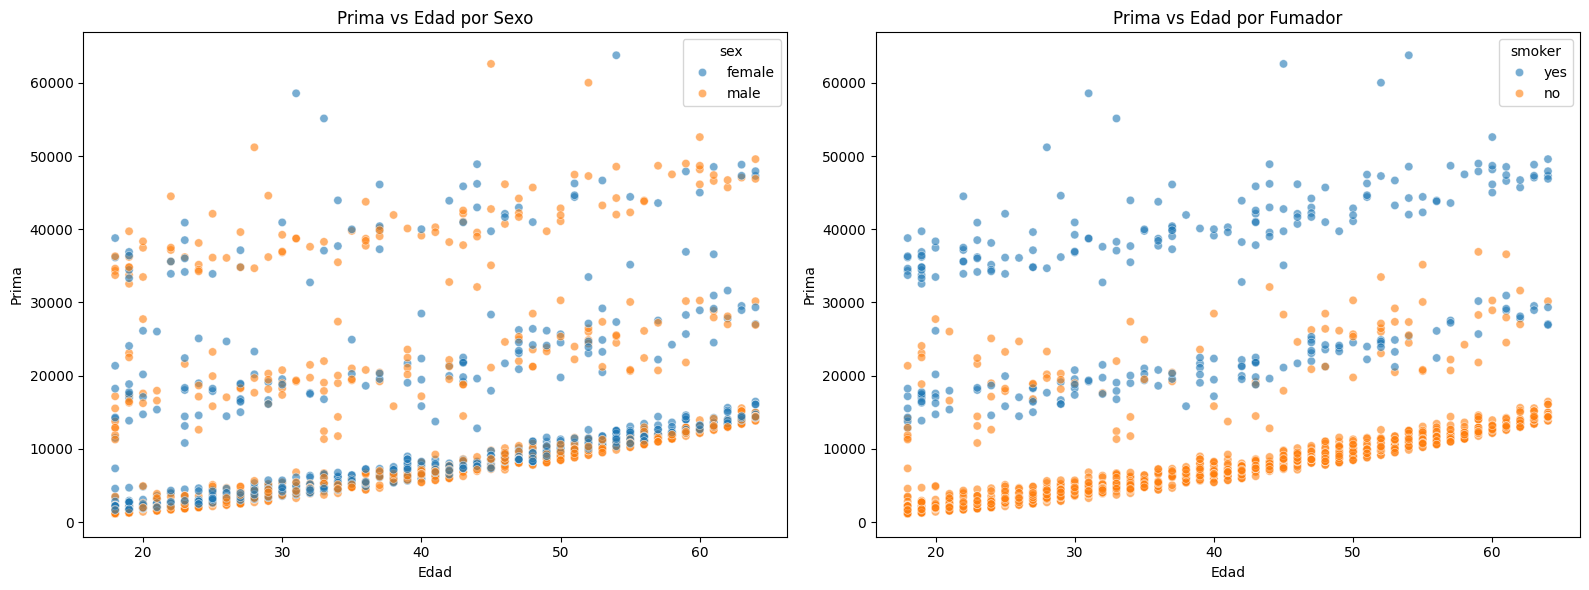

In [298]:
#Comparar Primas vs edad por sexo y por smoker
fig, axes = plt.subplots(1, 2, figsize=(16, 6))


sns.scatterplot(data=df, x='age', y='charges', hue='sex', alpha=0.6, ax=axes[0])
axes[0].set_title('Prima vs Edad por Sexo')
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Prima')


sns.scatterplot(data=df, x='age', y='charges', hue='smoker', alpha=0.6, ax=axes[1])
axes[1].set_title('Prima vs Edad por Fumador')
axes[1].set_xlabel('Edad')
axes[1].set_ylabel('Prima')


plt.tight_layout()
plt.show()

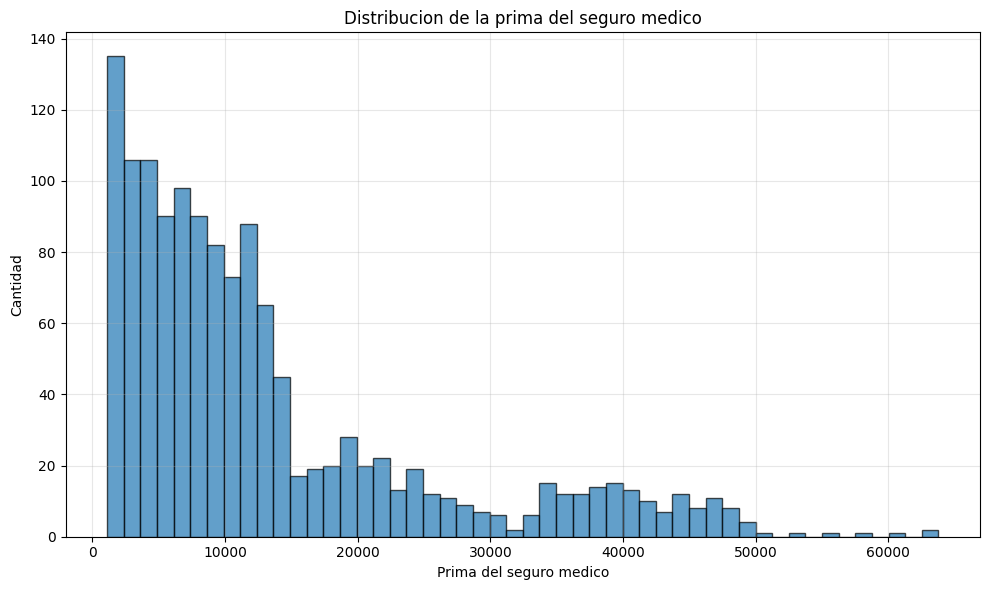

In [299]:
# HISTOGRAMA DE PRECIOS
plt.figure(figsize=(10,6))
plt.hist(df['charges'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribucion de la prima del seguro medico')
plt.xlabel('Prima del seguro medico')
plt.ylabel('Cantidad')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [300]:
#Codificar df
df_encoded1 = pd.get_dummies(df[cat_cols])
df_corr = pd.concat([df_encoded1, df['charges']], axis=1)
corr = df_corr.corr()

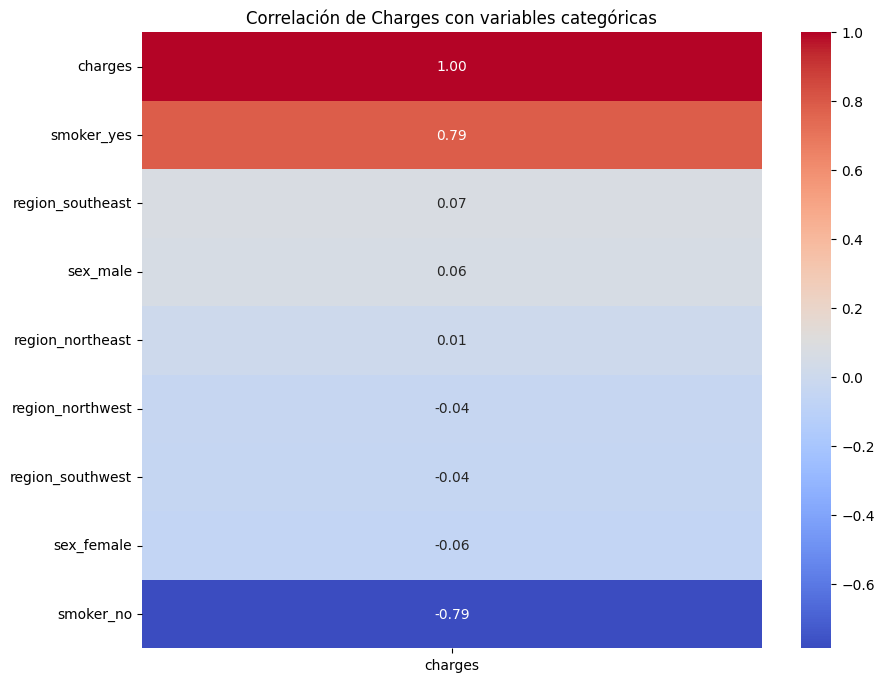

In [301]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr[['charges']].sort_values(by='charges', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación de Charges con variables categóricas')
plt.show()

In [302]:
df_encoded1.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,True,False,False,True,False,False,False,True
1,False,True,True,False,False,False,True,False
2,False,True,True,False,False,False,True,False
3,False,True,True,False,False,True,False,False
4,False,True,True,False,False,True,False,False


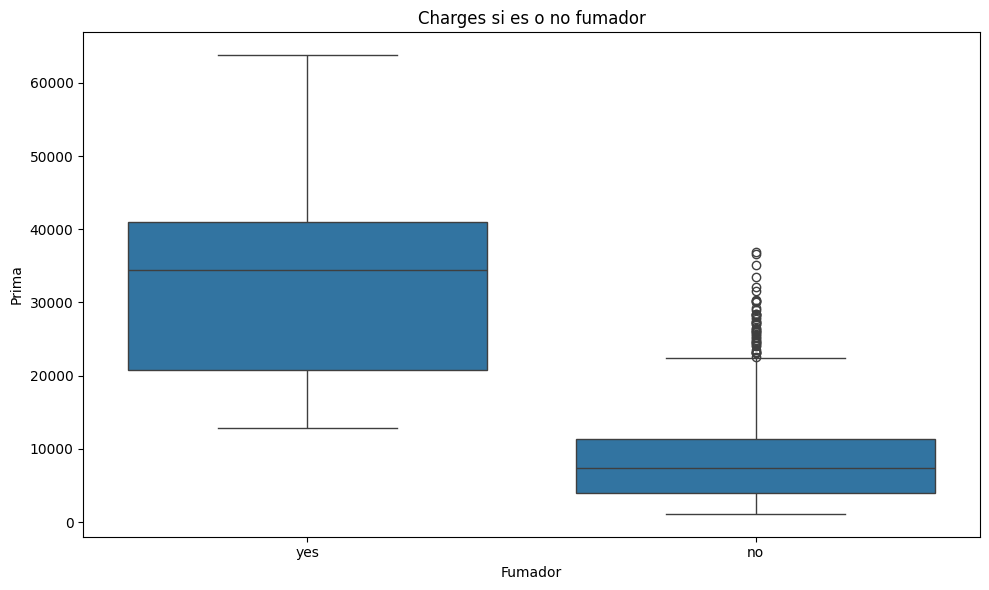

In [303]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Charges si es o no fumador')
plt.xlabel("Fumador")
plt.ylabel("Prima")
plt.tight_layout()
plt.show()

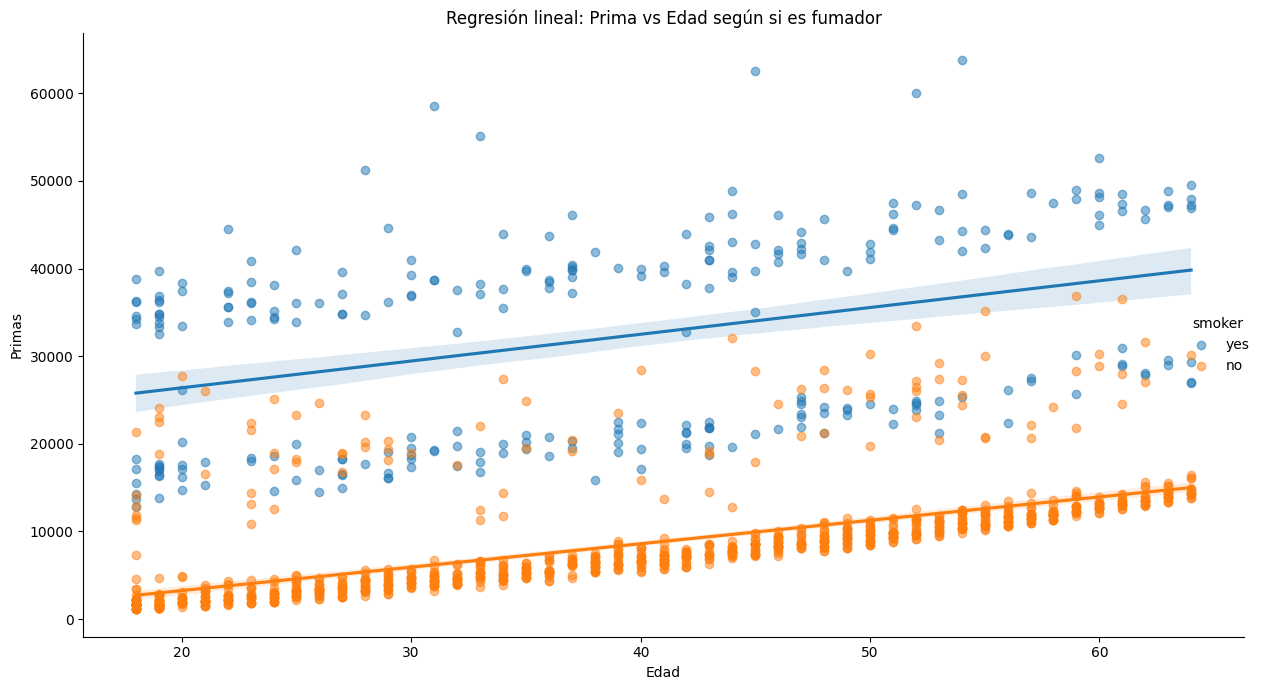

In [304]:
# Gráfico de regresión con hue por fumador
sns.lmplot(data=df, x='age', y='charges', hue='smoker', aspect=1.7, height=7, scatter_kws={'alpha':0.5})

plt.title('Regresión lineal: Prima vs Edad según si es fumador')
plt.xlabel('Edad')
plt.ylabel('Primas')
plt.tight_layout()
plt.show()

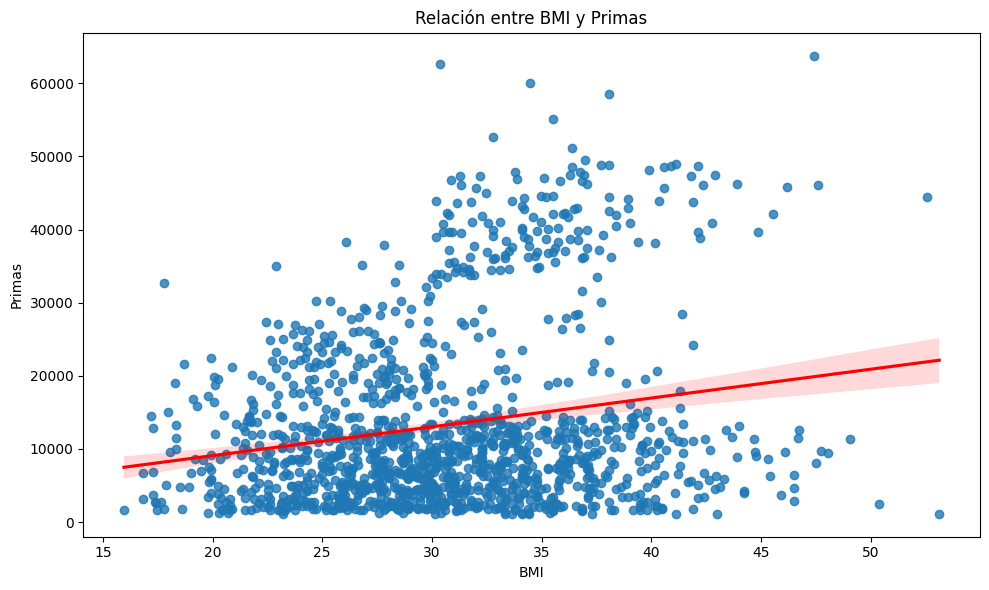

In [305]:

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='bmi', y='charges', scatter_kws={'alpha':0.8}, line_kws={'color':'red'})
plt.title('Relación entre BMI y Primas')
plt.xlabel('BMI')
plt.ylabel('Primas')
plt.tight_layout()
plt.show()


In [306]:
X = df.drop('charges', axis=1)
y = df['charges']


In [307]:
num_cols = X.select_dtypes(include='number').columns
cat_cols = X.select_dtypes(include='object').columns

In [308]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [309]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoder.fit(X_train[cat_cols])

X_train_cat = encoder.transform(X_train[cat_cols])
X_test_cat = encoder.transform(X_test[cat_cols])

In [310]:
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[num_cols])
X_test_num = scaler.transform(X_test[num_cols])

In [311]:

X_train_cat_df = pd.DataFrame(X_train_cat, columns=encoder.get_feature_names_out(cat_cols)).reset_index(drop=True)
X_test_cat_df = pd.DataFrame(X_test_cat, columns=encoder.get_feature_names_out(cat_cols)).reset_index(drop=True)


X_train_num_df = pd.DataFrame(X_train_num, columns=num_cols).reset_index(drop=True)
X_test_num_df = pd.DataFrame(X_test_num, columns=num_cols).reset_index(drop=True)



In [312]:
X_train_final = pd.concat([X_train_cat_df, X_train_num_df], axis=1)
X_test_final = pd.concat([X_test_cat_df, X_test_num_df], axis=1)


In [313]:
X_train_final.columns = X_train_final.columns.astype(str)
X_test_final.columns = X_test_final.columns.astype(str)

In [314]:
model = LinearRegression()

model.fit(X_train_final, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [315]:
print(f"Intercepto (b0): {model.intercept_}")
print(f"Coeficientes (b1): {model.coef_}")

Intercepto (b0): 8947.952195069163
Coeficientes (b1): [ -101.54205399 23077.76459287  -391.76145478  -838.91961573
  -659.13975155  3472.97555343  1927.82825101   636.5011853 ]


In [316]:
y_pred = model.predict(X_test_final)
y_pred

array([ 8.14369388e+03,  5.73711568e+03,  1.43693149e+04,  3.17455136e+04,
        8.96238666e+03,  1.31497224e+04,  3.04467607e+04,  1.45328881e+03,
        1.06330184e+04,  1.13189438e+04,  1.03778536e+04,  3.31184377e+04,
        3.10772527e+04,  1.74119253e+04,  1.08016743e+04,  9.52889964e+03,
        4.16103784e+03,  3.17315373e+04,  3.21938875e+03,  5.22992460e+03,
        3.54979004e+03,  3.02837740e+04,  1.48989509e+04,  3.04569093e+04,
        3.11077668e+04,  5.51196081e+03,  3.55030401e+04,  3.65704810e+04,
        1.14123133e+04,  1.42056990e+04,  6.50234029e+03,  1.27246945e+04,
        3.99806590e+02,  1.20883980e+04,  3.96592069e+04,  1.23395540e+04,
        4.74412279e+03,  3.91903157e+03,  3.08606789e+04,  8.95870663e+03,
        7.05389441e+03,  3.01125636e+04,  3.47804324e+04,  1.22916189e+04,
        7.35739310e+03,  3.42060530e+03,  6.21243471e+03,  8.98345200e+03,
        4.26401828e+03,  9.01992870e+03,  6.60149578e+03,  1.20802337e+04,
        3.12447687e+04,  

In [317]:
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 35478020.67523558
RMSE: 5956.342894363585
Coeficiente de determinación: 0.8069287081198013


In [ ]:
# Lasso 
lasso = Lasso(alpha=1.0)  
lasso.fit(X_train_final, y_train)
y_pred_lasso = lasso.predict(X_test_final)

In [ ]:
# Ridge 
ridge = Ridge(alpha=1.0)  
ridge.fit(X_train_final, y_train)
y_pred_ridge = ridge.predict(X_test_final)

In [320]:
# Evaluación
def evaluar_modelo(nombre, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\nModelo {nombre}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")

evaluar_modelo("Lasso", y_test, y_pred_lasso)
evaluar_modelo("Ridge", y_test, y_pred_ridge)


Modelo Lasso
MSE: 35493165.83
RMSE: 5957.61
R²: 0.8068

Modelo Ridge
MSE: 35663132.65
RMSE: 5971.86
R²: 0.8059
